In [26]:
import pandas as pd


In [118]:
df = pd.read_excel("MLBOOK_DATA.xlsx")
df.columns

Index(['商品ID', '商品名', '描述', '价格描述', '价格', '店铺名', '是否包邮', '服务标签', '商品标签', '作者',
       '作者分数', '出版社分数', '出版社独热编码', '出版社', '品牌分数', '品牌', '包装', '出版时间', '出版年份',
       '用纸', '正文语种', '页数', '评论数量', '好评数', '差评数', '是否实战', '是否框架', '畅销程度',
       '畅销分数'],
      dtype='object')

In [119]:
df.columns = ["ID", "Name", "Desc","PriceDesc","Price","Store",
              "IsFreeship","ServiceTag","BookTag","Author","AuthorScore",
             "PublisherScore","PublisherCode","Publisher","BrandScore",
              "Brand","Package","PubDate","PubYear","Paper","Language",
              "PageSize","CommentCount","GoodCount","BadCount","IsPractise",
              "IsFramework","SellLevel","SellScore"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              841 non-null    int64         
 1   Name            841 non-null    object        
 2   Desc            804 non-null    object        
 3   PriceDesc       841 non-null    object        
 4   Price           841 non-null    float64       
 5   Store           818 non-null    object        
 6   IsFreeship      841 non-null    int64         
 7   ServiceTag      841 non-null    int64         
 8   BookTag         802 non-null    object        
 9   Author          700 non-null    object        
 10  AuthorScore     841 non-null    int64         
 11  PublisherScore  841 non-null    int64         
 12  PublisherCode   841 non-null    int64         
 13  Publisher       790 non-null    object        
 14  BrandScore      841 non-null    int64         
 15  Brand 

In [120]:
filtered_df = df[df['Publisher'].notnull()]
filtered_df.to_csv("filterd_book.tsv",sep='\t',index=None)

In [121]:
filtered_df = pd.read_csv("filterd_book.tsv",sep='\t')

In [122]:
filtered_df.head()

,ID,Name,Desc,PriceDesc,Price,Store,IsFreeship,ServiceTag,BookTag,Author,...,Paper,Language,PageSize,CommentCount,GoodCount,BadCount,IsPractise,IsFramework,SellLevel,SellScore
0,12656251,强化学习/人工智能科学与技术丛书,作者丰富的行业实践经验赋予本书极强的实用性，涉及深度强化学习，内容丰富、易学实用，5位业界专...,较高,78.3,清华大学出版社,0,2,自营|放心购,邹伟,...,胶版纸,中文,380.0,820,119,0,0,0,一般,682.9899
1,70360732845,周志华作品 AI人工智能书籍：机器学习理论导引/机器学习 西瓜书 机器学习入门教材书籍 之 ...,周志华作品 AI人工智能书籍：机器学习理论导引/机器学习 西瓜书 机器学习入门教材书籍 之 ...,中,55.0,芝麻开门图书专营店,0,1,放心购|门店有售|到店自取|券99-5,周志华,...,NaN,NaN,NaN,766,78,0,0,0,一般,593.5046
2,70360732846,周志华作品 AI人工智能书籍：机器学习理论导引/机器学习 西瓜书 机器学习入门教材书籍 之 ...,周志华作品 AI人工智能书籍：机器学习理论导引/机器学习 西瓜书 机器学习入门教材书籍 之 ...,高,125.0,芝麻开门图书专营店,0,1,放心购|门店有售|到店自取|券99-5,周志华,...,NaN,NaN,NaN,766,78,0,0,0,一般,593.5046
3,70360732844,周志华作品 AI人工智能书籍：机器学习理论导引/机器学习 西瓜书 机器学习入门教材书籍 之 ...,周志华作品 AI人工智能书籍：机器学习理论导引/机器学习 西瓜书 机器学习入门教材书籍 之 ...,中,58.0,芝麻开门图书专营店,0,1,放心购|门店有售|到店自取|券99-5,周志华,...,NaN,NaN,NaN,766,78,0,0,0,一般,593.5046
4,16007151390,正版 机器学习 Tom Mitchell 曾华军 张银奎 计算机与互联网 |8185,正版书籍,低,22.0,互动出版网图书专营店,0,1,放心购|券每满300减30|满赠,美 Tom Mitchell,...,NaN,NaN,280.0,695,516,1,0,0,一般,259.4688


In [123]:
cols = filtered_df.columns.tolist()
print(len(cols))
sdf = filtered_df[["Price",  "IsFreeship","AuthorScore",
             "PublisherScore","PublisherCode","BrandScore",
              "PageSize","IsPractise", "IsFramework","SellLevel"]]

sdf = sdf.fillna(0)

factor = pd.factorize(sdf['SellLevel'])
sdf["SellLevel"] = factor[0]
definitions = factor[1]
print(definitions)

29
Index(['一般', '较不畅销', '畅销', '不畅销'], dtype='object')


In [124]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           790 non-null    float64
 1   IsFreeship      790 non-null    int64  
 2   AuthorScore     790 non-null    int64  
 3   PublisherScore  790 non-null    int64  
 4   PublisherCode   790 non-null    int64  
 5   BrandScore      790 non-null    int64  
 6   PageSize        790 non-null    float64
 7   IsPractise      790 non-null    int64  
 8   IsFramework     790 non-null    int64  
 9   SellLevel       790 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 61.8 KB


In [125]:
definitions

Index(['一般', '较不畅销', '畅销', '不畅销'], dtype='object')

In [126]:
sdf.SellLevel.value_counts()

1    311
2    259
3    148
0     72
Name: SellLevel, dtype: int64

In [13]:
sdf.describe()

,Price,IsFreeship,AuthorScore,PublisherScore,PublisherCode,BrandScore,PageSize,IsPractise,IsFramework,SellLevel
count,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000
mean,80.194013,0.178481,24.592405,42.227848,95.175949,25.101266,176.893671,0.317722,0.135443,1.611392
std,67.271250,0.383160,16.603203,13.755008,238.250815,17.655408,188.177926,0.465886,0.342413,0.891942
min,9.900000,0.000000,20.000000,10.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,49.925000,0.000000,20.000000,40.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000
50%,63.650000,0.000000,20.000000,50.000000,2.000000,10.000000,185.000000,0.000000,0.000000,2.000000
75%,82.475000,0.000000,20.000000,50.000000,3.000000,50.000000,313.750000,1.000000,0.000000,2.000000
max,703.000000,1.000000,89.000000,50.000000,700.000000,50.000000,1022.000000,1.000000,1.000000,3.000000


<h3>构建模型及训练</h3>

In [14]:
# 选择特征变量和目标变量
X = sdf.iloc[:,0:len(sdf.columns.tolist())-1].values
y = sdf.iloc[:,len(sdf.columns.tolist())-1].values

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.utils import resample
import pandas as pd
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 21)
print("train count:",len(X_train))
print("test count:",len(X_test))

train count: 711
test count: 79


In [16]:
# 对输入变量进行标准化处理
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
classifier = RandomForestClassifier(n_estimators = 150, max_depth = 3, criterion = 'entropy',random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=150,
                       random_state=42)

In [18]:
# 预测测试集
y_pred = classifier.predict(X_test)
print(pd.crosstab(y_test, y_pred, rownames=['Actual Class'], colnames=['Predicted Class']))

Predicted Class   1   2
Actual Class           
0                 5   2
1                26   3
2                 6  25
3                12   0


In [19]:
accuracy_score(y_test, y_pred)

0.6455696202531646

Feature importance ranking:
1. feature 5 (0.342802)
2. feature 1 (0.222356)
3. feature 6 (0.184823)
4. feature 0 (0.093399)
5. feature 3 (0.058993)
6. feature 4 (0.053921)
7. feature 8 (0.025651)
8. feature 2 (0.009201)
9. feature 7 (0.008854)


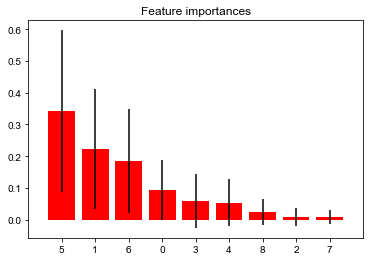

In [558]:
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature importance ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


In [559]:
result_importances = list(zip(sdf.columns[0:len(sdf.columns.tolist())-1], classifier.feature_importances_))
result_importances.sort(key=lambda x: x[1], reverse=True)
result_importances

[('BrandScore', 0.3428022722176),
 ('IsFreeship', 0.22235596785423495),
 ('PageSize', 0.1848230225863661),
 ('Price', 0.0933988347875788),
 ('PublisherScore', 0.05899335417414079),
 ('PublisherCode', 0.053921087685175464),
 ('IsFramework', 0.025650853746176365),
 ('AuthorScore', 0.009200572420654897),
 ('IsPractise', 0.00885403452807265)]

<h3>对比其它模型</h3>

In [560]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [561]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.5949367088607594

Accuracy :  0.5694444444444444


Text(0, 0.5, 'Feature Importance Score')

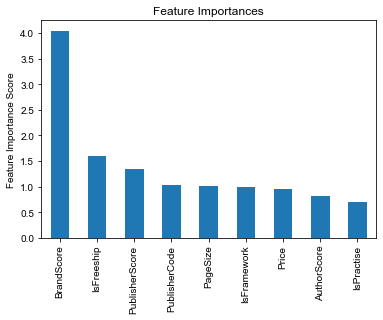

In [611]:
from sklearn import metrics
target = 'SellLevel'
predictors = [x for x in sdf.columns if x not in [target]]
msk = np.random.rand(len(sdf)) < 0.9
train = sdf[msk]
test = sdf[~msk]

xgb_model = XGBClassifier(num_class=4,learning_rate =0.1, n_estimators=100,max_depth=4,
 min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8, objective='multi:softmax',
 nthread=8,scale_pos_weight=0.6,seed=42)

xgb_model.fit(train[predictors], train[target],eval_metric='auc')

test_predictions = xgb_model.predict(test[predictors])
test_predprob = xgb_model.predict_proba(test[predictors])[:,1]

print("Accuracy : ", metrics.accuracy_score(test[target].values, test_predictions))

feat_imp = pd.Series(xgb_model.get_booster().get_score(importance_type= 'gain')).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
    


### 关联分析

In [7]:
cols = filtered_df.columns.tolist()
print(cols)

['ID', 'Name', 'Desc', 'PriceDesc', 'Price', 'Store', 'IsFreeship', 'ServiceTag', 'BookTag', 'Author', 'AuthorScore', 'PublisherScore', 'PublisherCode', 'Publisher', 'BrandScore', 'Brand', 'Package', 'PubDate', 'PubYear', 'Paper', 'Language', 'PageSize', 'CommentCount', 'GoodCount', 'BadCount', 'IsPractise', 'IsFramework', 'SellLevel', 'SellScore']


In [8]:
#选择关联分析的字段
adf = filtered_df[["PriceDesc", "Publisher", 'Author',"Package","SellLevel"]]
adf.head()

,PriceDesc,Publisher,Author,Package,SellLevel
0,较高,清华大学出版社,邹伟,平装,一般
1,中,清华大学出版社,周志华,NaN,一般
2,高,清华大学出版社,周志华,NaN,一般
3,中,清华大学出版社,周志华,NaN,一般
4,低,机械工业出版社,美 Tom Mitchell,NaN,一般


In [9]:
#包装为空的字段全部置为'平装'
adf['Package'] =  adf['Package'].fillna('平装')
# 过滤作者为空的数据
adf = adf[adf['Author'].notnull()]
# 滤除出版社为空的数据
adf = adf[adf['Publisher'].notnull()]

/opt/miniconda3/envs/book/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
adf.head()

,PriceDesc,Publisher,Author,Package,SellLevel
0,较高,清华大学出版社,邹伟,平装,一般
1,中,清华大学出版社,周志华,平装,一般
2,高,清华大学出版社,周志华,平装,一般
3,中,清华大学出版社,周志华,平装,一般
4,低,机械工业出版社,美 Tom Mitchell,平装,一般


In [11]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 789
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PriceDesc  700 non-null    object
 1   Publisher  700 non-null    object
 2   Author     700 non-null    object
 3   Package    700 non-null    object
 4   SellLevel  700 non-null    object
dtypes: object(5)
memory usage: 32.8+ KB


In [16]:
transacts = []
for i in range(0, len(adf)): 
    column_value = [adf.columns[j] +"=" + str(adf.values[i,j]) for j in range(0, len(adf.columns.tolist()))]
    transacts.append(column_value)

In [17]:
# 查看构建好的第一条记录
transacts[0]

['PriceDesc=较高',
 'Publisher=清华大学出版社',
 'Author=邹伟',
 'Package=平装',
 'SellLevel=一般']

In [13]:
!pip install apyori

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5973 sha256=adfb34fdb5651aafe8b7b8d6785ee0f3974563f8a7995c53234b87358e080e83
  Stored in directory: /Users/lully/Library/Caches/pip/wheels/c7/e8/b8/13725570d7ceeab9f3467e44e458d272300f6663dab35de034
Successfully built apyori


In [19]:
from apyori import apriori
rule = apriori(transacts, min_support=0.003, min_confidence=0.2, min_lift=3)
output = list(rule) 
output[0]

RelationRecord(items=frozenset({'PriceDesc=高', 'Author=Ian'}), support=0.004285714285714286, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Author=Ian'}), items_add=frozenset({'PriceDesc=高'}), confidence=1.0, lift=6.862745098039216)])

In [23]:
def re_orgnize_result(output):
    left         = [tuple(record[2][0][0])[0] for record in output]
    right         = [tuple(record[2][0][1])[0] for record in output]
    support    = [record[1] for record in output]
    confidence = [record[2][0][2] for record in output]
    lift       = [record[2][0][3] for record in output]
    return list(zip(left, right, support, confidence, lift))
results = re_orgnize_result(output)
odf = pd.DataFrame(results, columns = ['前项', '后项', '支持度', '置信度', '提升度'])
odf = odf.drop_duplicates(keep='first') #去重

In [24]:
odf.head()

,前项,后项,支持度,置信度,提升度
0,Author=Ian,PriceDesc=高,0.004286,1.0,6.862745
1,Author=Ian,Publisher=人民邮电出版社,0.004286,1.0,3.954802
2,Author=IanGoodfellow,PriceDesc=高,0.007143,1.0,6.862745
3,Author=IanGoodfellow,Publisher=人民邮电出版社,0.007143,1.0,3.954802
4,Author=何宇健,Publisher=电子工业出版社,0.004286,1.0,10.144928


In [443]:
odf.nlargest(n = 10, columns = ['提升度'])

,前项,后项,支持度,置信度,提升度
11,Author=周志华等,Publisher=机械工业出版社、电子工业出版社、清华大学出版社,0.012857,0.750000,58.333333
65,Author=周志华等,SellLevel=较不畅销,0.012857,0.750000,58.333333
63,Author=周志华等,PriceDesc=中,0.008571,0.500000,58.333333
140,Author=周志华等,SellLevel=较不畅销,0.008571,0.500000,58.333333
168,Author=IanGoodfellow,SellLevel=较不畅销,0.004286,0.600000,30.000000
120,Author=IanGoodfellow,Publisher=人民邮电出版社,0.007143,1.000000,29.166667
109,Package=精装,PriceDesc=中,0.004286,0.230769,26.923077
141,Author=周志华著,SellLevel=一般,0.004286,1.000000,26.923077
68,Author=周志华著,SellLevel=一般,0.004286,1.000000,25.925926
39,Author=Ian,PriceDesc=高,0.004286,1.000000,25.000000


In [444]:
rslt_df = odf[odf['后项'] == 'SellLevel=畅销'] 
rslt_df = rslt_df[rslt_df['前项'].str.contains("Author")]
rslt_df.nlargest(n = 10, columns = ['提升度'])

,前项,后项,支持度,置信度,提升度
97,Author=诸葛越,SellLevel=畅销,0.004286,0.6,8.235294


In [445]:
rslt_df = odf[odf['后项'] == 'SellLevel=不畅销'] 
rslt_df = rslt_df[rslt_df['前项'].str.contains("Publisher")]
rslt_df.nlargest(n = 10, columns = ['提升度'])

,前项,后项,支持度,置信度,提升度
118,Publisher=科学出版社,SellLevel=不畅销,0.005714,0.500000,10.294118
116,Publisher=东南大学出版社,SellLevel=不畅销,0.005714,0.222222,4.575163
106,Publisher=科学出版社,SellLevel=不畅销,0.007143,0.625000,3.871681
38,Publisher=科学出版社,SellLevel=不畅销,0.007143,0.625000,3.739316


In [446]:
rslt_df = odf[odf['后项'] == 'SellLevel=不畅销'] 
rslt_df = rslt_df[rslt_df['前项'].str.contains("Price")]
rslt_df.nlargest(n = 10, columns = ['提升度'])

,前项,后项,支持度,置信度,提升度
169,PriceDesc=中,SellLevel=不畅销,0.004286,0.3,16.153846
132,PriceDesc=中,SellLevel=不畅销,0.004286,0.3,15.000000


In [447]:
rslt_df = odf[odf['后项'] == 'SellLevel=畅销'] 
rslt_df = rslt_df[rslt_df['前项'].str.contains("PriceDesc")]
# rslt_df = rslt_df[rslt_df['前项'].str.contains("Package")]
rslt_df.nlargest(n = 10, columns = ['提升度'])

,前项,后项,支持度,置信度,提升度


In [451]:
rslt_df = odf[odf['前项'] == 'Author=赵卫东'] 
rslt_df.nlargest(n = 10, columns = ['提升度'])

,前项,后项,支持度,置信度,提升度
99,Author=赵卫东,PriceDesc=中,0.004286,0.75,5.769231
157,Author=赵卫东,Package=平装,0.004286,0.75,5.769231
98,Author=赵卫东,Package=平装,0.004286,0.75,3.034682


In [450]:
rslt_df = odf[odf['前项'] == 'Author=黄佳'] 
rslt_df.nlargest(n = 10, columns = ['提升度'])

,前项,后项,支持度,置信度,提升度
104,Author=黄佳,Publisher=人民邮电出版社,0.004286,1.0,4.046243
33,Author=黄佳,Publisher=人民邮电出版社,0.004286,1.0,3.954802


In [457]:
rslt_df = odf[odf['后项'] == 'Publisher=机械工业出版社'] 
rslt_df.nlargest(n = 10, columns = ['提升度'])

,前项,后项,支持度,置信度,提升度
75,Author=奥雷利安·杰龙,Publisher=机械工业出版社,0.004286,0.6,16.800000
125,Author=刘铁岩 陈薇 王太峰 高飞,Publisher=机械工业出版社,0.004286,1.0,5.882353
126,Author=加 Simon Haykin,Publisher=机械工业出版社,0.004286,1.0,5.882353
135,Author=周志华 王魏 高尉 张利军,Publisher=机械工业出版社,0.004286,1.0,5.882353
148,Author=海金,Publisher=机械工业出版社,0.004286,1.0,5.882353
153,Author=美迈克尔 贝耶勒Michael Be,Publisher=机械工业出版社,0.004286,1.0,5.882353
49,Author=刘铁岩 陈薇 王太峰 高飞,Publisher=机械工业出版社,0.004286,1.0,5.785124
51,Author=加 Simon Haykin,Publisher=机械工业出版社,0.004286,1.0,5.785124
61,Author=周志华 王魏 高尉 张利军,Publisher=机械工业出版社,0.004286,1.0,5.785124
86,Author=海金,Publisher=机械工业出版社,0.004286,1.0,5.785124


In [458]:
rslt_df = odf[odf['后项'] == 'Publisher=清华大学出版社'] 
rslt_df.nlargest(n = 10, columns = ['提升度'])

,前项,后项,支持度,置信度,提升度
66,Author=周志华著,Publisher=清华大学出版社,0.004286,1.0,6.666667
81,Author=李航,Publisher=清华大学出版社,0.010000,1.0,6.666667
84,Author=林大贵,Publisher=清华大学出版社,0.004286,1.0,6.666667
93,Author=范淼,Publisher=清华大学出版社,0.004286,1.0,6.666667
100,Author=郑秋生,Publisher=清华大学出版社,0.004286,1.0,6.666667
101,Author=雷明,Publisher=清华大学出版社,0.005714,1.0,6.666667
129,SellLevel=一般,Publisher=清华大学出版社,0.004286,1.0,6.666667
12,Author=周志华著,Publisher=清华大学出版社,0.004286,1.0,6.306306
22,Author=李航,Publisher=清华大学出版社,0.010000,1.0,6.306306
23,Author=林大贵,Publisher=清华大学出版社,0.004286,1.0,6.306306


In [459]:
rslt_df = odf[odf['后项'] == 'Publisher=清华大学出版社'] 
rslt_df = rslt_df[rslt_df['前项'].str.contains("SellLevel")]
rslt_df.nlargest(n = 10, columns = ['提升度'])

,前项,后项,支持度,置信度,提升度
129,SellLevel=一般,Publisher=清华大学出版社,0.004286,1.0,6.666667
57,SellLevel=一般,Publisher=清华大学出版社,0.004286,1.0,6.306306
167,SellLevel=一般,Publisher=清华大学出版社,0.007143,0.5,3.333333
119,SellLevel=一般,Publisher=清华大学出版社,0.007143,0.5,3.153153


In [461]:
rslt_df = odf[odf['后项'] == 'Publisher=中信出版社'] 
rslt_df.nlargest(n = 10, columns = ['提升度'])

,前项,后项,支持度,置信度,提升度
36,Package=精装,Publisher=中信出版社,0.004286,0.230769,17.948718


## 评论分析

In [ ]:
import pandas as pd
import jieba
from bertopic import BERTopic

In [ ]:
df_comments = pd.read_excel("comments.xlsx")
my_stopwords =  [i.strip() for i in open('hit_stopwords.txt',encoding='utf-8').readlines()]

df_comments['review_seg'] = df_comments['Comment'].apply(lambda x : ' '.join([j.strip() for j in jieba.cut(x) if j not in my_stopwords]))
docs = df_comments["review_seg"].tolist()
print("doc length:",len(docs))
docs[0]

In [3]:
df_comments.head()

,Book_id,Username,Comment_time,Comment,review_seg
0,70360732846,jd_187388rfo,2020-12-02 20:02:36,非常好，包装的非常精美，,非常 好 包装 非常 精美
1,70360732846,Kushim_Hu,2020-09-03 10:57:37,品相很好，书页质量没得说，文字打印清晰,品相 很 好 书页 质量 没得说 文字 打印 清晰
2,70360732846,流小熙,2020-07-29 09:19:33,书很新很好\n下次还会再来\n机器学习冲冲冲,书 很 新 很 好 下次 还会 再 来 机器 学习 冲冲
3,70360732846,白色的米,2020-12-20 17:14:24,书本外包装完好无损，里面字体打印清晰，很好,书本 外包装 完好无损 里面 字体 打印 清晰 很 好
4,70360732846,j***p,2020-12-04 17:17:45,图书很好，包装精细，内容详实,图书 很 好 包装 精细 内容 详实


In [12]:
model = BERTopic(language="chinese (simplified)",nr_topics="auto")

In [13]:
topics, probs = model.fit_transform(docs)

In [14]:
model.update_topics(docs, topics, n_gram_range=(1, 3))

In [10]:
model.reduce_topics(docs, nr_topics=10)

In [15]:
model.topic_labels_

{-1: '-1_非常_非常 非常_引号_之间',
 0: '0_非常_不错_很快_京东',
 1: '1_清晰_打印_打印 清晰_清楚',
 2: '2_经典_学习_书籍_数学',
 3: '3_产品_视觉_机器_学习',
 4: '4_人工智能_机器人_本书_人工智能 发展',
 5: '5_物流_物流 很快 包装_物流 很快_很快 包装',
 6: '6_学习_质量_学习 质量_这些',
 7: '7_深度 学习_深度_学习_慢慢',
 8: '8_物流_包装_采购 书籍 出版社_物流 包装 正版',
 9: '9_python_复杂 产品_想法_如何',
 10: '10_实用_专业 非常 实用_专业 非常_实用 不错',
 11: '11_本书_2020_方式 配图_好书 之一 2020',
 12: '12_神经网络_比较_实验室_神经网络 入门',
 13: '13_书里 内容_书里_tensorflow_内容 更加',
 14: '14_本书_实体书 支持_必须 一本 实体书_书籍 必须',
 15: '15_没有_没有 空白页 纸张_破损 没有_不错 开始 学习',
 16: '16_全面_详细_全面 了解_值得 学习',
 17: '17_颜色 质量_颜色_颜色 质量 非常_非常 质量',
 18: '18_618_活动_当天 下单 隔天_囤书',
 19: '19_非常 本书_本书 非常适合_理论性_非常 本书 非常适合',
 20: '20_昨天 今天_手感 不错_收到 神速_质量 手感 不错'}

In [16]:
model.topic_representations_

{-1: [('非常', 0.06967096339487239),
  ('非常 非常', 0.06048089152008186),
  ('引号', 0.03453477223425819),
  ('之间', 0.03453477223425819),
  ('惊讶', 0.03453477223425819),
  ('非常 非常 非常', 0.03453477223425819),
  ('书名号', 0.03453477223425819),
  ('价格 实惠', 0.03024044576004093),
  ('非常 满意 非常', 0.025724806220314946),
  ('实惠', 0.02524837688461818)],
 0: [('非常', 0.017285105508856726),
  ('不错', 0.015053971421767369),
  ('很快', 0.01348458611864831),
  ('京东', 0.013461539545245945),
  ('内容', 0.012649059927048276),
  ('质量', 0.011994346993234957),
  ('包装', 0.011560291403362588),
  ('很多', 0.010453350272488917),
  ('发货', 0.010277147068429315),
  ('本书', 0.010129952136777372)],
 1: [('清晰', 0.07779836893946916),
  ('打印', 0.07455593770332672),
  ('打印 清晰', 0.07455593770332672),
  ('清楚', 0.06604929254058266),
  ('清晰 书本', 0.05920877459743754),
  ('书本', 0.055608934748614565),
  ('印刷', 0.05533551548633206),
  ('没得说 文字', 0.042571666233474956),
  ('书页 质量 没得说', 0.042571666233474956),
  ('字印', 0.042571666233474956)],
 2: [('

In [17]:
model.visualize_topics()

In [18]:
model.visualize_distribution(model.probabilities_,min_probability=0.1)


In [19]:
model.visualize_hierarchy()

In [20]:
model.visualize_heatmap()

In [29]:
model.visualize_barchart()

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from umap import UMAP

# Prepare embeddings
# sentence_model = BERTopic(embedding_model="all-mpnet-base-v2")
sentence_model = SentenceTransformer("distiluse-base-multilingual-cased-v2")

embeddings = sentence_model.encode(docs, show_progress_bar=False)

# Train BERTopic
topic_model = BERTopic().fit(docs, embeddings)

In [35]:
# Run the visualization with the original embeddings
# topic_model.visualize_documents(docs, embeddings=embeddings)

# Reduce dimensionality of embeddings, this step is optional but much faster to perform iteratively:
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings)


# model.visualize_documents(docs)

In [38]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF sparse matrix
vectorizer = TfidfVectorizer(min_df=5)
embeddings = vectorizer.fit_transform(docs)

# Model
model_tfidf = BERTopic(language="chinese (simplified)")
topics1, probabilities1 = model_tfidf.fit_transform(docs, embeddings)

In [24]:
similar_topics, similarity = model.find_topics("纸质", top_n=5)
similar_topics

[1, 11, 0, 2, 6]

In [27]:
model.get_topic(1)

[('清晰', 0.07779836893946916),
 ('打印', 0.07455593770332672),
 ('打印 清晰', 0.07455593770332672),
 ('清楚', 0.06604929254058266),
 ('清晰 书本', 0.05920877459743754),
 ('书本', 0.055608934748614565),
 ('印刷', 0.05533551548633206),
 ('没得说 文字', 0.042571666233474956),
 ('书页 质量 没得说', 0.042571666233474956),
 ('字印', 0.042571666233474956)]

In [26]:
# 保存模型
model.save("my_model")

In [ ]:
# Load model
my_model = BERTopic.load("my_model")

# 聚类分析

In [127]:
#数据预处理
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(sdf)
scaled_data = scaler.transform(sdf)

In [128]:
sdf.head()

,Price,IsFreeship,AuthorScore,PublisherScore,PublisherCode,BrandScore,PageSize,IsPractise,IsFramework,SellLevel
0,78.3,0,20,40,1,10,380.0,0,0,0
1,55.0,0,89,40,1,10,0.0,0,0,0
2,125.0,0,89,40,1,10,0.0,0,0,0
3,58.0,0,89,40,1,10,0.0,0,0,0
4,22.0,0,20,50,2,30,280.0,0,0,0


In [129]:
from sklearn.cluster import KMeans
def get_best_clusters(df, max_K):
    clusters_centers = []
    k_list = []
    for k in range(1, max_K):
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        clusters_centers.append(kmeans_model.inertia_)
        k_list.append(k)
    return clusters_centers, k_list
clusters_centers, k_values = get_best_clusters(scaled_data, 30)


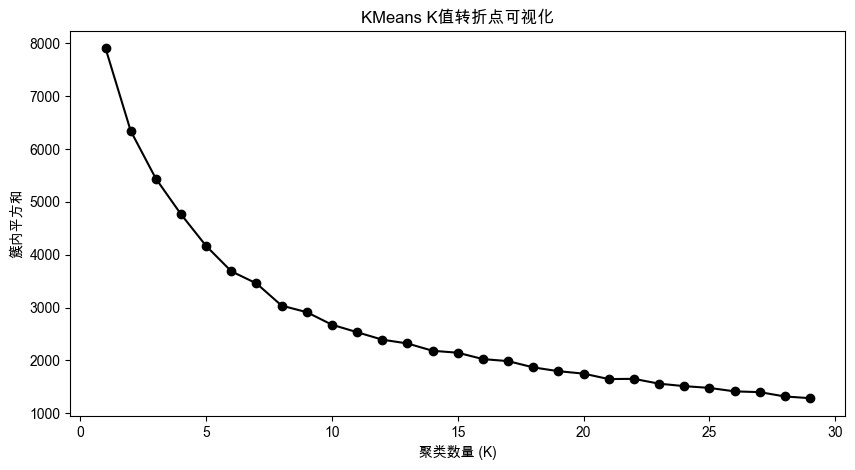

In [130]:
import matplotlib.pyplot as plt
def generate_plot(clusters_centers, k_values):
    figure = plt.subplots(figsize = (10, 5))
    plt.plot(k_values, clusters_centers, 'o-', color = 'black')
    plt.xlabel("聚类数量 (K)")
    plt.ylabel("簇内平方和")
    plt.title("KMeans K值转折点可视化")
    plt.show()
generate_plot(clusters_centers, k_values)

In [131]:
kmeans_model = KMeans(n_clusters = 8)
kmeans_model.fit(scaled_data)
new_df = sdf.copy()
new_df["clusters"] = kmeans_model.labels_
new_df.head()

,Price,IsFreeship,AuthorScore,PublisherScore,PublisherCode,BrandScore,PageSize,IsPractise,IsFramework,SellLevel,clusters
0,78.3,0,20,40,1,10,380.0,0,0,0,2
1,55.0,0,89,40,1,10,0.0,0,0,0,6
2,125.0,0,89,40,1,10,0.0,0,0,0,6
3,58.0,0,89,40,1,10,0.0,0,0,0,6
4,22.0,0,20,50,2,30,280.0,0,0,0,0


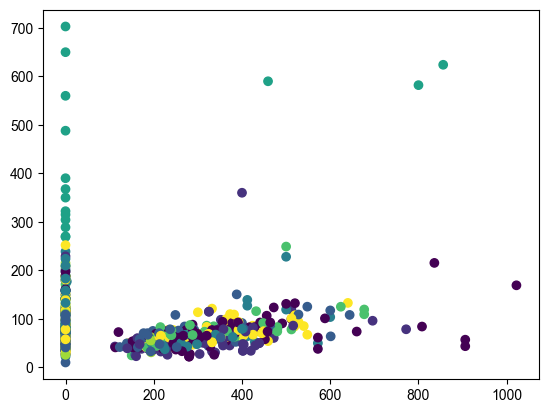

In [134]:
plt.scatter(new_df["PageSize"], new_df["Price"],  c = new_df["clusters"])

In [136]:

all_predictions = kmeans_model.predict(sdf)
print(all_predictions)

[4 6 4 6 0 4 0 4 1 1 6 4 4 4 4 0 4 0 0 4 4 4 4 4 4 4 0 4 4 4 0 4 4 4 0 4 4
 4 0 6 4 4 4 0 4 4 4 4 0 4 4 4 4 4 4 0 4 4 0 4 0 4 4 4 4 4 0 1 4 4 4 4 4 0
 4 4 4 4 4 0 6 1 4 4 4 4 4 4 4 4 4 4 6 0 0 4 0 0 0 4 0 4 4 4 0 4 1 4 4 4 4
 1 0 4 0 6 4 4 4 0 1 4 4 6 4 4 1 4 4 4 4 1 4 4 4 4 4 4 4 1 4 4 4 4 4 4 1 4
 4 4 4 4 1 1 0 1 0 1 0 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 0 4 4 1 4 4 4 4 0 4
 4 4 4 4 4 1 1 4 1 4 4 4 0 4 0 4 4 4 4 6 1 4 4 0 0 4 4 1 6 4 4 4 4 0 4 1 4
 4 0 4 4 0 0 4 4 0 4 4 4 4 0 4 1 0 1 1 4 4 4 4 4 4 4 4 4 6 4 4 4 0 4 4 0 4
 4 4 4 1 4 4 4 4 1 1 1 1 1 1 1 1 1 4 4 4 0 4 1 4 4 4 4 4 4 1 4 4 4 1 1 4 0
 4 4 0 4 4 4 4 4 1 4 4 4 4 4 4 1 1 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 1 4 0 4 4 1 4 4 1 4 4 4 0 0 4 0 4 4 4 4 0 0 0 0 4 4 4 4 4 4 4 6 0 4 4 4 4
 4 4 4 4 4 6 4 4 4 4 4 4 4 4 4 0 4 4 0 0 4 4 4 0 4 0 1 4 0 4 0 0 4 4 1 4 0
 1 0 4 4 4 4 0 4 1 4 4 0 4 1 4 4 1 0 0 0 0 4 0 0 4 0 4 4 4 1 0 4 4 1 1 0 4
 4 4 0 1 0 1 4 1 4 0 4 1 4 0 1 4 0 4 0 4 0 4 0 0 4 4 4 4 4 4 0 4 0 4 0 4 1
 4 0 0 4 4 0 0 4 4 0 4 4 

/opt/miniconda3/envs/book/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
